# SENTIMENT ANALYSIS OF PRODUCT REVIEWS USING ML MODEL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
data1 = pd.read_csv("Samsung_Galaxy_S23_FE.csv")
data2 = pd.read_csv("OnePlus_11R_5g.csv")
data3 = pd.read_csv("Oneplus_Nord_3_5g.csv")

In [5]:
data1

,Unique_ID,reviewer_name,No-of_comment_likes,No-of_comment_dislikes,cust_reviews,Ratings,comment_text
0,0,Viraj Bhojane,380,72,Nice,4,The camera is next level. But I'm facing some ...
1,1,Dhyey Thakkar,89,17,Must buy!,5,Awesome photography like apple must buy don't ...
2,2,Koteshwar Rao Maripudi,485,166,Very Good,4,"It's an excellent phone with great display, pe..."
3,3,anupam sahoo,301,104,Awesome,5,📷-awesome Display-outstanding 🔋-could be bette...
4,4,Anuj Verma,252,97,Excellent,5,Battery last Max a day with moderate use. Rest...
...,...,...,...,...,...,...,...
137,137,narendra singh,1,4,Decent product,3,I am disappointed with the display quality it ...
138,138,Manas Kumar Panda,13,8,Nice,3,Battery is pathetic.. not expected at this pri...
139,139,Flipkart Customer,2,0,Classy product,5,Good product.
140,140,chirag gupta,26,8,Very Good,4,Brought Samsung galaxy S23 fe 15 days ago.....


In [6]:
data2

,Unique_ID,Reviewer_Name,No-of_comment_likes,No-of_comment_dislikes,comment,Ratings,comment_text
0,0,Chinmaya chihnara,110,20,Excellent,5,I love to used this OnePlus 11R device since 2...
1,1,AJAY SINGH,598,146,Wonderful,5,Awesome.
2,2,Mosarof Hossain,36,4,Terrific,5,On of the best budget flagship phone. Decent C...
3,3,Ankith Sharma,81,14,Perfect product!,5,Nice phone .very good gaming experiences.
4,4,C H Laskar,68,11,Super!,5,Wow 😍 mind-blowing ! Best all rounder smartpho...
...,...,...,...,...,...,...,...
515,515,PRADIP DAS,0,1,Best in the market!,5,Nice Phone.
516,516,Flipkart Customer,0,0,Awesome,5,Need to more upgrade to front camara.
517,517,Amit Kumar Pal,0,0,Mind-blowing purchase,5,Best phone under this range.
518,518,Flipkart Customer,0,0,Really Nice,4,It's nice.


In [7]:
data3

,Unique_ID,Reviewer_Name,No-of_comment_likes,No-of_comment_dislikes,comment,Ratings,comment_text
0,0,Rajiv Bhatt,224,42,Good choice,4,Everything is correct except the battery . Bat...
1,1,Pritam Kumar Patra,248,53,Delightful,4,Review for the OnePlus Note 3:1. **Performance...
2,2,Aisha Roy,191,36,Awesome,5,Happy to have this phone.
3,3,AnilRoy Customer,588,131,Wonderful,5,This range phone is good but phone need to upg...
4,4,Sonu Rao,654,157,Just wow!,5,Super.
...,...,...,...,...,...,...,...
745,745,Ayan Aryan,0,0,Simply awesome,5,I love this Phone.
746,746,Flipkart Customer,0,0,Terrific,5,Great product by one plus and fast service by ...
747,747,ajit Palva,0,0,Good choice,4,Superb ?? I love it.
748,748,Flipkart Customer,0,0,Super!,5,Perfect Result I like it.


# Data exploration and cleaning

In [9]:
# Handling inconsistent Data

data1=data1.rename(columns={'reviewer_name':'Reviewer_Name', 'cust_reviews':'comment'})

In [10]:
data1=data1.rename(columns={'Unnamed: 0':'Unique_ID'})

In [19]:
# After handling inconsistent data
data1

,Unique_ID,Reviewer_Name,No-of_comment_likes,No-of_comment_dislikes,comment,Ratings,comment_text
0,0,Viraj Bhojane,380,72,Nice,4,The camera is next level. But I'm facing some ...
1,1,Dhyey Thakkar,89,17,Must buy!,5,Awesome photography like apple must buy don't ...
2,2,Koteshwar Rao Maripudi,485,166,Very Good,4,"It's an excellent phone with great display, pe..."
3,3,anupam sahoo,301,104,Awesome,5,📷-awesome Display-outstanding 🔋-could be bette...
4,4,Anuj Verma,252,97,Excellent,5,Battery last Max a day with moderate use. Rest...
...,...,...,...,...,...,...,...
137,137,narendra singh,1,4,Decent product,3,I am disappointed with the display quality it ...
138,138,Manas Kumar Panda,13,8,Nice,3,Battery is pathetic.. not expected at this pri...
139,139,Flipkart Customer,2,0,Classy product,5,Good product.
140,140,chirag gupta,26,8,Very Good,4,Brought Samsung galaxy S23 fe 15 days ago.....


In [21]:
data2=data2.rename(columns={'Unnamed: 0':'Unique_ID'})

In [23]:
data2

,Unique_ID,Reviewer_Name,No-of_comment_likes,No-of_comment_dislikes,comment,Ratings,comment_text
0,0,Chinmaya chihnara,110,20,Excellent,5,I love to used this OnePlus 11R device since 2...
1,1,AJAY SINGH,598,146,Wonderful,5,Awesome.
2,2,Mosarof Hossain,36,4,Terrific,5,On of the best budget flagship phone. Decent C...
3,3,Ankith Sharma,81,14,Perfect product!,5,Nice phone .very good gaming experiences.
4,4,C H Laskar,68,11,Super!,5,Wow 😍 mind-blowing ! Best all rounder smartpho...
...,...,...,...,...,...,...,...
515,515,PRADIP DAS,0,1,Best in the market!,5,Nice Phone.
516,516,Flipkart Customer,0,0,Awesome,5,Need to more upgrade to front camara.
517,517,Amit Kumar Pal,0,0,Mind-blowing purchase,5,Best phone under this range.
518,518,Flipkart Customer,0,0,Really Nice,4,It's nice.


In [25]:
data3=data3.rename(columns={'Unnamed: 0':'Unique_ID'})

In [27]:
data3

,Unique_ID,Reviewer_Name,No-of_comment_likes,No-of_comment_dislikes,comment,Ratings,comment_text
0,0,Rajiv Bhatt,224,42,Good choice,4,Everything is correct except the battery . Bat...
1,1,Pritam Kumar Patra,248,53,Delightful,4,Review for the OnePlus Note 3:1. **Performance...
2,2,Aisha Roy,191,36,Awesome,5,Happy to have this phone.
3,3,AnilRoy Customer,588,131,Wonderful,5,This range phone is good but phone need to upg...
4,4,Sonu Rao,654,157,Just wow!,5,Super.
...,...,...,...,...,...,...,...
745,745,Ayan Aryan,0,0,Simply awesome,5,I love this Phone.
746,746,Flipkart Customer,0,0,Terrific,5,Great product by one plus and fast service by ...
747,747,ajit Palva,0,0,Good choice,4,Superb ?? I love it.
748,748,Flipkart Customer,0,0,Super!,5,Perfect Result I like it.


In [29]:
data1.columns

Index(['Unique_ID', 'Reviewer_Name', 'No-of_comment_likes',
       'No-of_comment_dislikes', 'comment', 'Ratings', 'comment_text'],
      dtype='object')

In [31]:
data1.shape

(142, 7)

In [33]:
data2.shape

(520, 7)

In [35]:
data3.shape

(750, 7)

In [37]:
# Data integration
# Combining 3 dataframes to single dataframe

df = pd.concat([data1,data2,data3],axis=0)
df.reset_index(drop=True, inplace=True)

In [39]:
# dropping unnecessary columns

# df.drop(df_data.columns[0], axis=1, inplace=True)

In [43]:
df.to_csv("Products_reviews_data1.csv", index=False)

In [47]:
# By Using FileLink from IPython.display to create a clickable link in Jupyter Notebook for users to download the CSV file

from IPython.display import FileLink
FileLink("Products_reviews_data1.csv")

C:\Users\ASUS\OneDrive - SIR PADAMPAT SINGHANIA UNIVERSITY\Desktop\Xebia_Internship_project\Products_reviews_data1.csv

In [5]:
df = pd.read_csv("Products_reviews_data1.csv")

In [7]:
df

,Unique_ID,Reviewer_Name,No-of_comment_likes,No-of_comment_dislikes,comment,Ratings,comment_text
0,1,Viraj Bhojane,380,72,Nice,4,The camera is next level. But I'm facing some ...
1,2,Dhyey Thakkar,89,17,Must buy!,5,Awesome photography like apple must buy don't ...
2,3,Koteshwar Rao Maripudi,485,166,Very Good,4,"It's an excellent phone with great display, pe..."
3,4,anupam sahoo,301,104,Awesome,5,📷-awesome Display-outstanding 🔋-could be bette...
4,5,Anuj Verma,252,97,Excellent,5,Battery last Max a day with moderate use. Rest...
...,...,...,...,...,...,...,...
1407,1408,Ayan Aryan,0,0,Simply awesome,5,I love this Phone.
1408,1409,Flipkart Customer,0,0,Terrific,5,Great product by one plus and fast service by ...
1409,1410,ajit Palva,0,0,Good choice,4,Superb ?? I love it.
1410,1411,Flipkart Customer,0,0,Super!,5,Perfect Result I like it.


In [45]:
# After merging dataframes

df.columns

Index(['Unique_ID', 'Reviewer_Name', 'No-of_comment_likes',
       'No-of_comment_dislikes', 'comment', 'Ratings', 'comment_text'],
      dtype='object')

In [47]:
df.shape

(1412, 7)

In [9]:
#shuffling the dataset

df = df.sample(frac = 1)

In [11]:
df

,Unique_ID,Reviewer_Name,No-of_comment_likes,No-of_comment_dislikes,comment,Ratings,comment_text
906,907,Chinmaya Nayak,0,0,Mind-blowing purchase,5,"Value for money, nice product."
242,243,Ganesh Chinnu,1,0,Perfect product!,5,Awesome one plus 11r.
1364,1365,Flipkart Customer,8,6,Worthless,1,Phone does not feel premium in hand very bad l...
469,470,Vansh Jain,0,0,Simply awesome,5,Nice phone.
821,822,Himanshu Sharma,0,0,Brilliant,5,"I'll update my review after some time,so far l..."
...,...,...,...,...,...,...,...
816,817,Prince Yadav,0,0,Mind-blowing purchase,5,Nice performance this mobile Nord 3.
1085,1086,DEEPAK KUMAR,0,0,Just okay,3,"Battery performance too bad ,drains rapidly.. ..."
1124,1125,B G Gohil,0,0,Best in the market!,5,"I have no words, Amazing experience with one p..."
704,705,Shubhadip giri Shubhadip,7,1,Terrific,5,Vare nice ???????? aim happy.


In [55]:
#Checking for null values

df.isnull().sum()

Unique_ID                 0
Reviewer_Name             0
No-of_comment_likes       0
No-of_comment_dislikes    0
comment                   0
Ratings                   0
comment_text              0
dtype: int64

In [57]:
df.dtypes

Unique_ID                  int64
Reviewer_Name             object
No-of_comment_likes        int64
No-of_comment_dislikes     int64
comment                   object
Ratings                    int64
comment_text              object
dtype: object

In [59]:
df.describe()

,Unique_ID,No-of_comment_likes,No-of_comment_dislikes,Ratings
count,1412.000000,1412.000000,1412.000000,1412.000000
mean,706.500000,6.994334,1.983003,4.334278
std,407.753602,44.499723,12.625545,1.104793
min,1.000000,0.000000,0.000000,1.000000
25%,353.750000,0.000000,0.000000,4.000000
50%,706.500000,0.000000,0.000000,5.000000
75%,1059.250000,1.000000,0.000000,5.000000
max,1412.000000,654.000000,188.000000,5.000000


In [61]:
# Again checking for unique values and Missing values and if there its count. Also ensuring its datatypes and storage space it needed

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1412 entries, 902 to 577
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unique_ID               1412 non-null   int64 
 1   Reviewer_Name           1412 non-null   object
 2   No-of_comment_likes     1412 non-null   int64 
 3   No-of_comment_dislikes  1412 non-null   int64 
 4   comment                 1412 non-null   object
 5   Ratings                 1412 non-null   int64 
 6   comment_text            1412 non-null   object
dtypes: int64(4), object(3)
memory usage: 88.2+ KB


In [63]:
# Checking for Unique values in each feature

columns = [df.columns]
for col in df:
    print("No. of Unique values in feature",col, " is: ", df[col].nunique())

No. of Unique values in feature Unique_ID  is:  1412
No. of Unique values in feature Reviewer_Name  is:  1203
No. of Unique values in feature No-of_comment_likes  is:  63
No. of Unique values in feature No-of_comment_dislikes  is:  42
No. of Unique values in feature comment  is:  58
No. of Unique values in feature Ratings  is:  5
No. of Unique values in feature comment_text  is:  1154


In [65]:
df["comment"].unique()

array(['Worst experience ever!', 'Good quality product',
       'Worth every penny', 'Best in the market!', 'Wonderful',
       'Brilliant', 'Great product', 'Terrific', 'Nice',
       'Value-for-money', 'Super!', 'Pretty good', 'Terrific purchase',
       'Terrible product', 'Nice product', 'Fabulous!',
       'Perfect product!', 'Mind-blowing purchase', 'Simply awesome',
       'Just okay', 'Not good', 'Just wow!', 'Classy product', 'Awesome',
       'Could be way better', 'Must buy!', 'Excellent', 'Worth the money',
       "Don't waste your money", 'Highly recommended',
       'Expected a better product', 'Really Nice', 'Good choice',
       'Best value for money', 'Very Good', 'Unsatisfactory', 'Horrible',
       'Does the job', 'Delightful', 'Worthless', 'Fair',
       'Poor Camera, Battery , Network. Do not waste your money.',
       'Decent product', 'Bad quality', 'Did not meet expectations',
       'Hated it!', 'Not recommended at all', 'Good', 'Very poor',
       'Useless pro

In [67]:
df["Ratings"].unique()

array([1, 4, 5, 3, 2], dtype=int64)

In [69]:
df['Ratings'].value_counts()

Ratings
5    899
4    282
3    116
1     81
2     34
Name: count, dtype: int64

<Axes: title={'center': 'Count of Rating stars'}, xlabel='Ratings'>

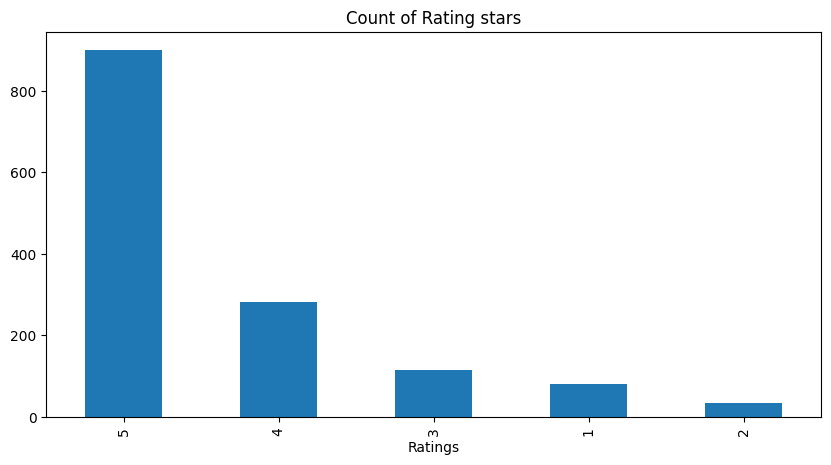

In [71]:
# Plotting the Count of Ratings column

df["Ratings"].value_counts().plot(kind='bar' ,title= "Count of Rating stars", figsize = (10,5))

In [13]:
# Assigning ratings to 0 and 1 values for positive and negative classification

df["Ratings"] = np.where(df["Ratings"] < 3, 0, df["Ratings"])
df["Ratings"] = np.where(df["Ratings"] >= 3, 1, df["Ratings"])


In [15]:
df

,Unique_ID,Reviewer_Name,No-of_comment_likes,No-of_comment_dislikes,comment,Ratings,comment_text
906,907,Chinmaya Nayak,0,0,Mind-blowing purchase,1,"Value for money, nice product."
242,243,Ganesh Chinnu,1,0,Perfect product!,1,Awesome one plus 11r.
1364,1365,Flipkart Customer,8,6,Worthless,0,Phone does not feel premium in hand very bad l...
469,470,Vansh Jain,0,0,Simply awesome,1,Nice phone.
821,822,Himanshu Sharma,0,0,Brilliant,1,"I'll update my review after some time,so far l..."
...,...,...,...,...,...,...,...
816,817,Prince Yadav,0,0,Mind-blowing purchase,1,Nice performance this mobile Nord 3.
1085,1086,DEEPAK KUMAR,0,0,Just okay,1,"Battery performance too bad ,drains rapidly.. ..."
1124,1125,B G Gohil,0,0,Best in the market!,1,"I have no words, Amazing experience with one p..."
704,705,Shubhadip giri Shubhadip,7,1,Terrific,1,Vare nice ???????? aim happy.


In [17]:
# Feature engineering
# Adding new column feature of word counts to df

df["word_counts"]=df["comment_text"].apply(lambda x: len(str(x.split())))

In [19]:
df

,Unique_ID,Reviewer_Name,No-of_comment_likes,No-of_comment_dislikes,comment,Ratings,comment_text,word_counts
906,907,Chinmaya Nayak,0,0,Mind-blowing purchase,1,"Value for money, nice product.",46
242,243,Ganesh Chinnu,1,0,Perfect product!,1,Awesome one plus 11r.,34
1364,1365,Flipkart Customer,8,6,Worthless,0,Phone does not feel premium in hand very bad l...,100
469,470,Vansh Jain,0,0,Simply awesome,1,Nice phone.,18
821,822,Himanshu Sharma,0,0,Brilliant,1,"I'll update my review after some time,so far l...",87
...,...,...,...,...,...,...,...,...
816,817,Prince Yadav,0,0,Mind-blowing purchase,1,Nice performance this mobile Nord 3.,55
1085,1086,DEEPAK KUMAR,0,0,Just okay,1,"Battery performance too bad ,drains rapidly.. ...",132
1124,1125,B G Gohil,0,0,Best in the market!,1,"I have no words, Amazing experience with one p...",79
704,705,Shubhadip giri Shubhadip,7,1,Terrific,1,Vare nice ???????? aim happy.,45


In [81]:
df.to_csv('Products_reviews_data2.csv')

In [97]:
from IPython.display import FileLink
FileLink("Products_reviews_data2.csv")

C:\Users\ASUS\OneDrive - SIR PADAMPAT SINGHANIA UNIVERSITY\Desktop\Xebia_Internship_project\Products_reviews_data2.csv

# Importing cleaned dataset

In [21]:
df_data1 = pd.read_csv("Products_reviews_data2.csv")

Text(0.5, 1.0, 'Avg no. of words in comment vs Ratings')

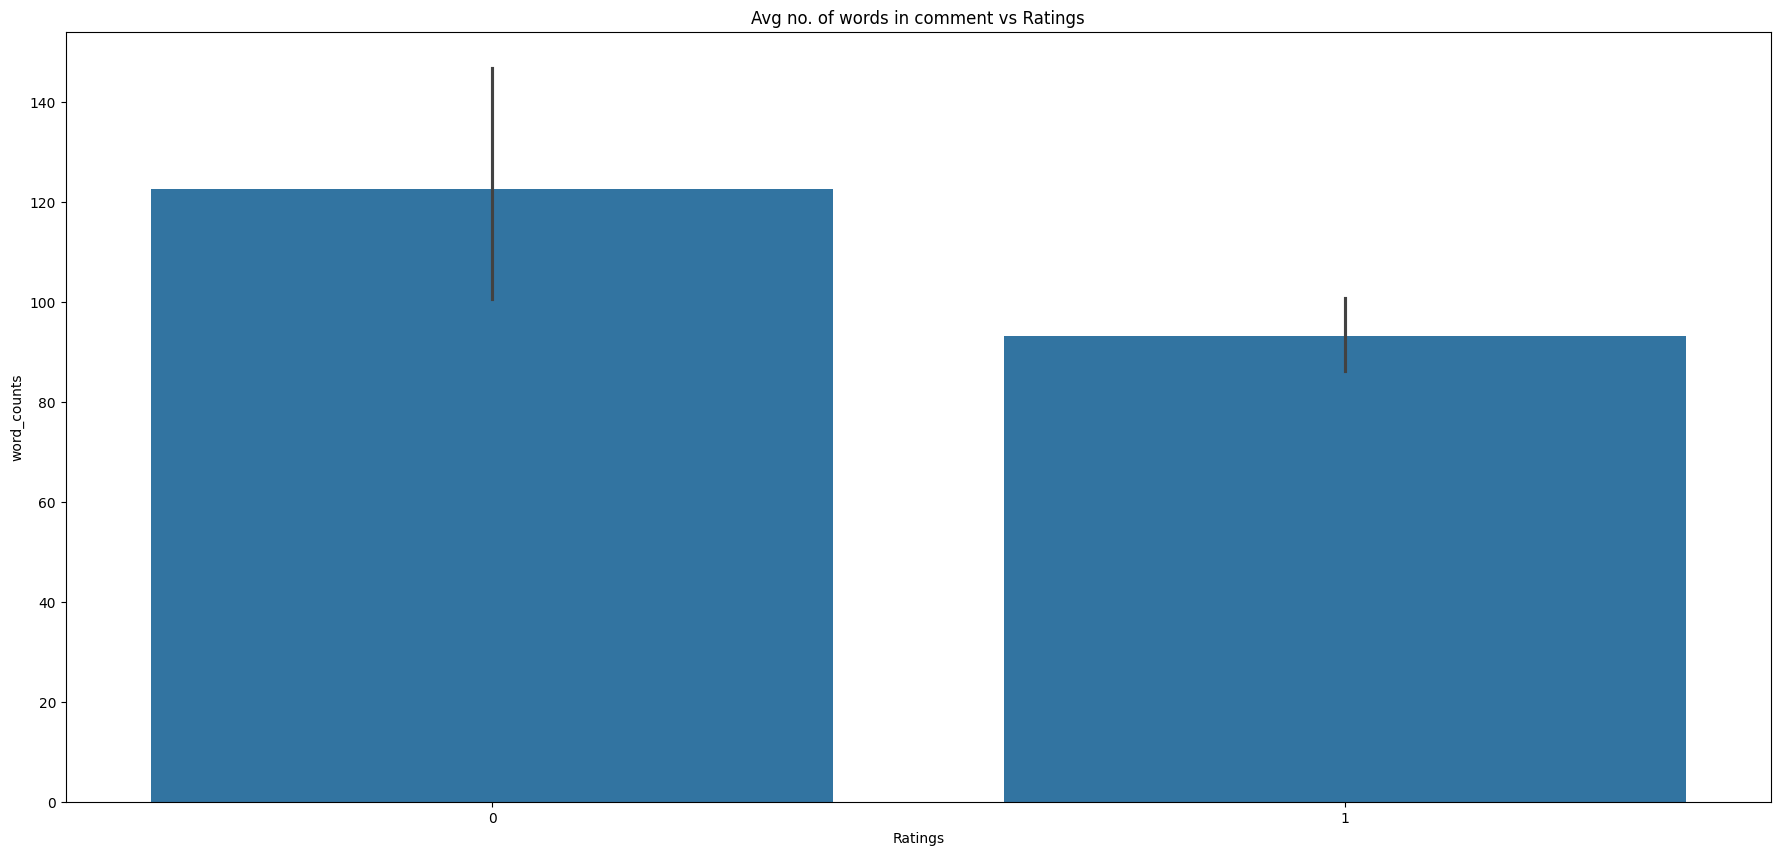

In [23]:
# Plotting of no. of words in ratings vs comment

plt.figure(figsize=(22,10))
sns.barplot(x='Ratings', y='word_counts', data=df_data1)
plt.title("Avg no. of words in comment vs Ratings")

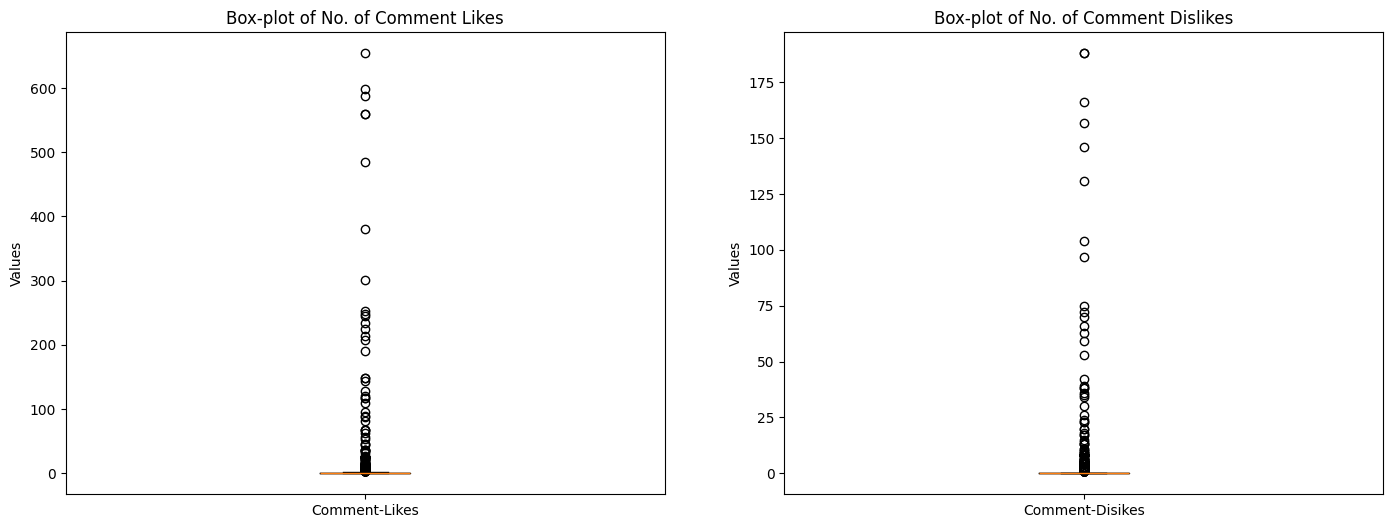

In [25]:
# Outlier detection using boxplots

fig, axes=plt.subplots(1,2, figsize=(17,6))

axes[0].boxplot(df_data1["No-of_comment_likes"], tick_labels=['Comment-Likes'])
axes[0].set_title("Box-plot of No. of Comment Likes")
axes[0].set_ylabel('Values')

axes[1].boxplot(df_data1["No-of_comment_dislikes"], tick_labels=['Comment-Disikes'])
axes[1].set_title("Box-plot of No. of Comment Dislikes")
axes[1].set_ylabel('Values')

plt.show()


In [333]:
pip install imbalanced-learn


   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   --------- ------------------------------ 61.4/258.3 kB 1.1 MB/s eta 0:00:01
   ----------------- ---------------------- 112.6/258.3 kB 1.3 MB/s eta 0:00:01
   -------------------------------------- - 245.8/258.3 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 1.5 MB/s eta 0:00:00


# Preprocessing the text

In [27]:
import nltk
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
import re

In [28]:
# !pip3 install inflect
# !pip3 install gensim

In [29]:
# pip install tensorflow

In [33]:
import inflect
p = inflect.engine()
from nltk.stem import WordNetLemmatizer
import re
from nltk.tokenize import word_tokenize
import gensim
import string
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [35]:
# Text preprocessing function

def text_preprocessing(text):
    def remove_emoji(text):
        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"     # Emoticons
                                   u"\U0001F300-\U0001F5FF"     # Symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"     # Transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"     # Flags (iOS)
                                   u"\U00002702-\U000027B0"     # Other symbols
                                   u"\U000024C2-\U0001F251"     # Enclosed characters
                                   "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)

    text = text.lower()                                # Convert text to lowercase
    text = re.sub(r'\S+@\S+', '', text)                # Remove email addresses
    text = re.sub(r'\d+', '', text)                    # Remove digits
    text = re.sub(r'[^\w\s]', '', text)                # Remove punctuation
    text = text.strip()                                # Remove leading and trailing whitespace
    text = remove_emoji(text)                          # Remove emojis

    # Tokenization and removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    
    # Handling negations and emphasis
    negation_words = ["not", "no", "never", "didn't", "doesn't", "don't", "aren't", "isn't", "wasn't", "weren't", "can't", "couldn't"]
    negated = False
    result_tokens = []
    
    for idx, token in enumerate(tokens):
        if token in negation_words:
            negated = True
            result_tokens.append(token)  # Including negation word itself
        elif negated and token in stop_words:
            negated = False
        elif negated:
            result_tokens.append("not_" + token)  # Negating the following word
            negated = False
        elif token not in stop_words:
            result_tokens.append(token)
    
    # Lemmatizing the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in result_tokens if token.isalpha()]
    
    text = " ".join(tokens)

    return text

df_data1['comment_text'] = df_data1['comment_text'].apply(text_preprocessing)

In [39]:
# Preprocessing the example comment from df dataset

example_comment = df.comment_text[925]
print(example_comment)

preprocessed_comment = text_preprocessing(example_comment)
print(preprocessed_comment)

This is amazing product and I got brand New mobile not a activated and refurbished mobile.
amazing product got brand new mobile not activated refurbished mobile


In [41]:
example_comment1 = df.comment_text[690]
print(example_comment1)

preprocessed_comment3 = text_preprocessing(example_comment1)
print(preprocessed_comment3)

Camera is awesome and battery drained bit faster and when playing game mobile heating is 42degreeToo hot.
camera awesome battery drained bit faster playing game mobile heating degreetoo hot


In [45]:
example_comment2 = df.comment_text[33]
print(example_comment2)

preprocessed_comment4 = text_preprocessing(example_comment2)
print(preprocessed_comment4)

Sometimes it becomes impossible to touch the mobile because of heat. Other than the heating issue, everything is great. To be specific, camera, display, look these are the plus point for this mobile..
sometimes becomes impossible touch mobile heat heating issue everything great specific camera display look plus point mobile


In [49]:
# splitting data

from sklearn.model_selection import train_test_split

X = df_data1['comment_text']  # Feature column
y = df_data1['Ratings']       # Target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:

train = pd.DataFrame({'comment_text': X_train, 'Ratings': y_train})
test = pd.DataFrame({'comment_text': X_test, 'Ratings': y_test})

In [59]:
# Adding another column of word counts after preprocessing

train['word_counts_after_preprocessing'] = train['comment_text'].apply(lambda x: len(str(x).split()))
test['word_counts_after_preprocessing'] = test['comment_text'].apply(lambda x: len(str(x).split()))

In [61]:
# Counting the occurrences of each class before oversampling

print("Before Oversampling, counts of label '1': {}".format(sum(train['Ratings'] == 1)))
print("Before Oversampling, counts of label '0': {}".format(sum(train['Ratings'] == 0)))

Before Oversampling, counts of label '1': 905
Before Oversampling, counts of label '0': 83


In [63]:
# Oversampling the minority class in the training set

from sklearn.utils import resample
train_majority = train[train['Ratings'] == 1]
train_minority = train[train['Ratings'] == 0]

train_minority_upsampled = resample(train_minority, 
                                    replace=True,     
                                    n_samples=len(train_majority),    
                                    random_state=123) 

train_resampled = pd.concat([train_majority, train_minority_upsampled])
X_train_resampled = train_resampled.drop('Ratings', axis=1)
y_train_resampled = train_resampled['Ratings']

In [65]:
# Counting the occurrences of each class after oversampling

print("After Oversampling, counts of label '1': {}".format(sum(y_train_resampled == 1)))
print("After Oversampling, counts of label '0': {}".format(sum(y_train_resampled == 0)))

After Oversampling, counts of label '1': 905
After Oversampling, counts of label '0': 905


In [68]:
# Tokenization and other model training steps

from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train_resampled['comment_text'])

X_train_resampled['comment_text'] = X_train_resampled['comment_text'].apply(text_preprocessing)
X_test = test
X_test['comment_text'] = X_test['comment_text'].apply(text_preprocessing)

# Tokenizing preprocessed text
X_train_resampled['text_tok'] = tokenizer.texts_to_sequences(X_train_resampled['comment_text'].values)
X_test['text_tok'] = tokenizer.texts_to_sequences(X_test['comment_text'].values)

In [70]:
X_train_resampled.head()

,comment_text,word_counts_after_preprocessing,text_tok
1360,good mobile,2,"[3, 11]"
1205,good,1,[3]
294,great product one plus fast service flipkart,7,"[67, 8, 19, 59, 20, 52, 36]"
813,perfect phone,2,"[276, 2]"
693,battery drain fast charging ok battery drain fast,8,"[1, 12, 20, 49, 84, 1, 12, 20]"


In [72]:
X_test.head()

,comment_text,Ratings,word_counts_after_preprocessing,text_tok
741,one plus back,1,3,"[19, 59, 222]"
865,oneplus nord g average phone,1,5,"[33, 41, 58, 62, 2]"
339,good,1,1,[3]
192,awesome,1,1,[31]
203,amazing,1,1,[87]


In [74]:
# Padding and Truncating

from tensorflow.keras.preprocessing import sequence
max_comment_length = 1500
X_train_pad = sequence.pad_sequences(X_train_resampled['text_tok'].values, maxlen=max_comment_length, padding='post')
X_test_pad = sequence.pad_sequences(X_test['text_tok'].values, maxlen=max_comment_length, padding='post')

In [76]:
# Loading GloVe Vectors
# Global Vector for word representations 

import tensorflow as tf
import pickle
glove_path = r'C:\Users\ASUS\OneDrive - SIR PADAMPAT SINGHANIA UNIVERSITY\Desktop\Xebia_Internship_project\glove.6B\glove.6B.200d.txt'

def load_glove_vectors(file_path):
    glove = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            glove[word] = vector
    return glove

glove = load_glove_vectors(glove_path)
glove_words = set(glove.keys())


In [77]:
from numpy import zeros

# Adjust max_vocabulary based on tokenizer word index
max_vocabulary = min(10000, len(tokenizer.word_index) + 1)

# Creating embedding matrix
embedding_matrix = np.zeros((max_vocabulary, 200))
for word, i in tokenizer.word_index.items():
    if i < max_vocabulary:
        if word in glove_words:
            embedding_vector = glove[word]
            embedding_matrix[i] = embedding_vector

In [80]:
# Preparing data for model training

from tensorflow.python.keras.utils import np_utils

x_train = X_train_pad
x_test = X_test_pad
Y_train = y_train_resampled
Y_test = test['Ratings']

In [82]:
# Building the model

from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Bidirectional, LSTM, Embedding
#  Input layer
review = Input(shape=(max_comment_length,), name='comment_input')

In [84]:
# Use the embedding matrix in the embedding layer

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
x = Embedding(output_dim=200, input_dim=max_vocabulary, weights=[embedding_matrix], trainable=False)(review)

# Bidirectional LSTM layer
lstm_layer = Bidirectional(LSTM(100))(x)

# Dropout for regularization
dropout_layer = Dropout(0.5)(lstm_layer)

# Flatten layer if needed
flatten_layer = Flatten()(dropout_layer)

# Dense layers
dense_layer1 = Dense(64, activation="relu", kernel_initializer="he_normal", kernel_regularizer=l2(0.001))(flatten_layer)
dense_layer2 = Dense(8, activation="relu", kernel_initializer="he_normal", kernel_regularizer=l2(0.001))(dense_layer1)

# Output layer
output = Dense(1, activation="sigmoid", name="output")(dense_layer2)

# Compile the model
model = Model(inputs=[review], outputs=[output])
model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ comment_input (InputLayer)           │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 1500, 200)           │         288,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 200)                 │         240,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 542,593 (2.07 MB)

 Trainable params: 254,193 (992.94 KB)

 Non-trainable params: 288,400 (1.10 MB)

None


In [85]:
# pip install pydot

In [88]:
# pip install graphviz

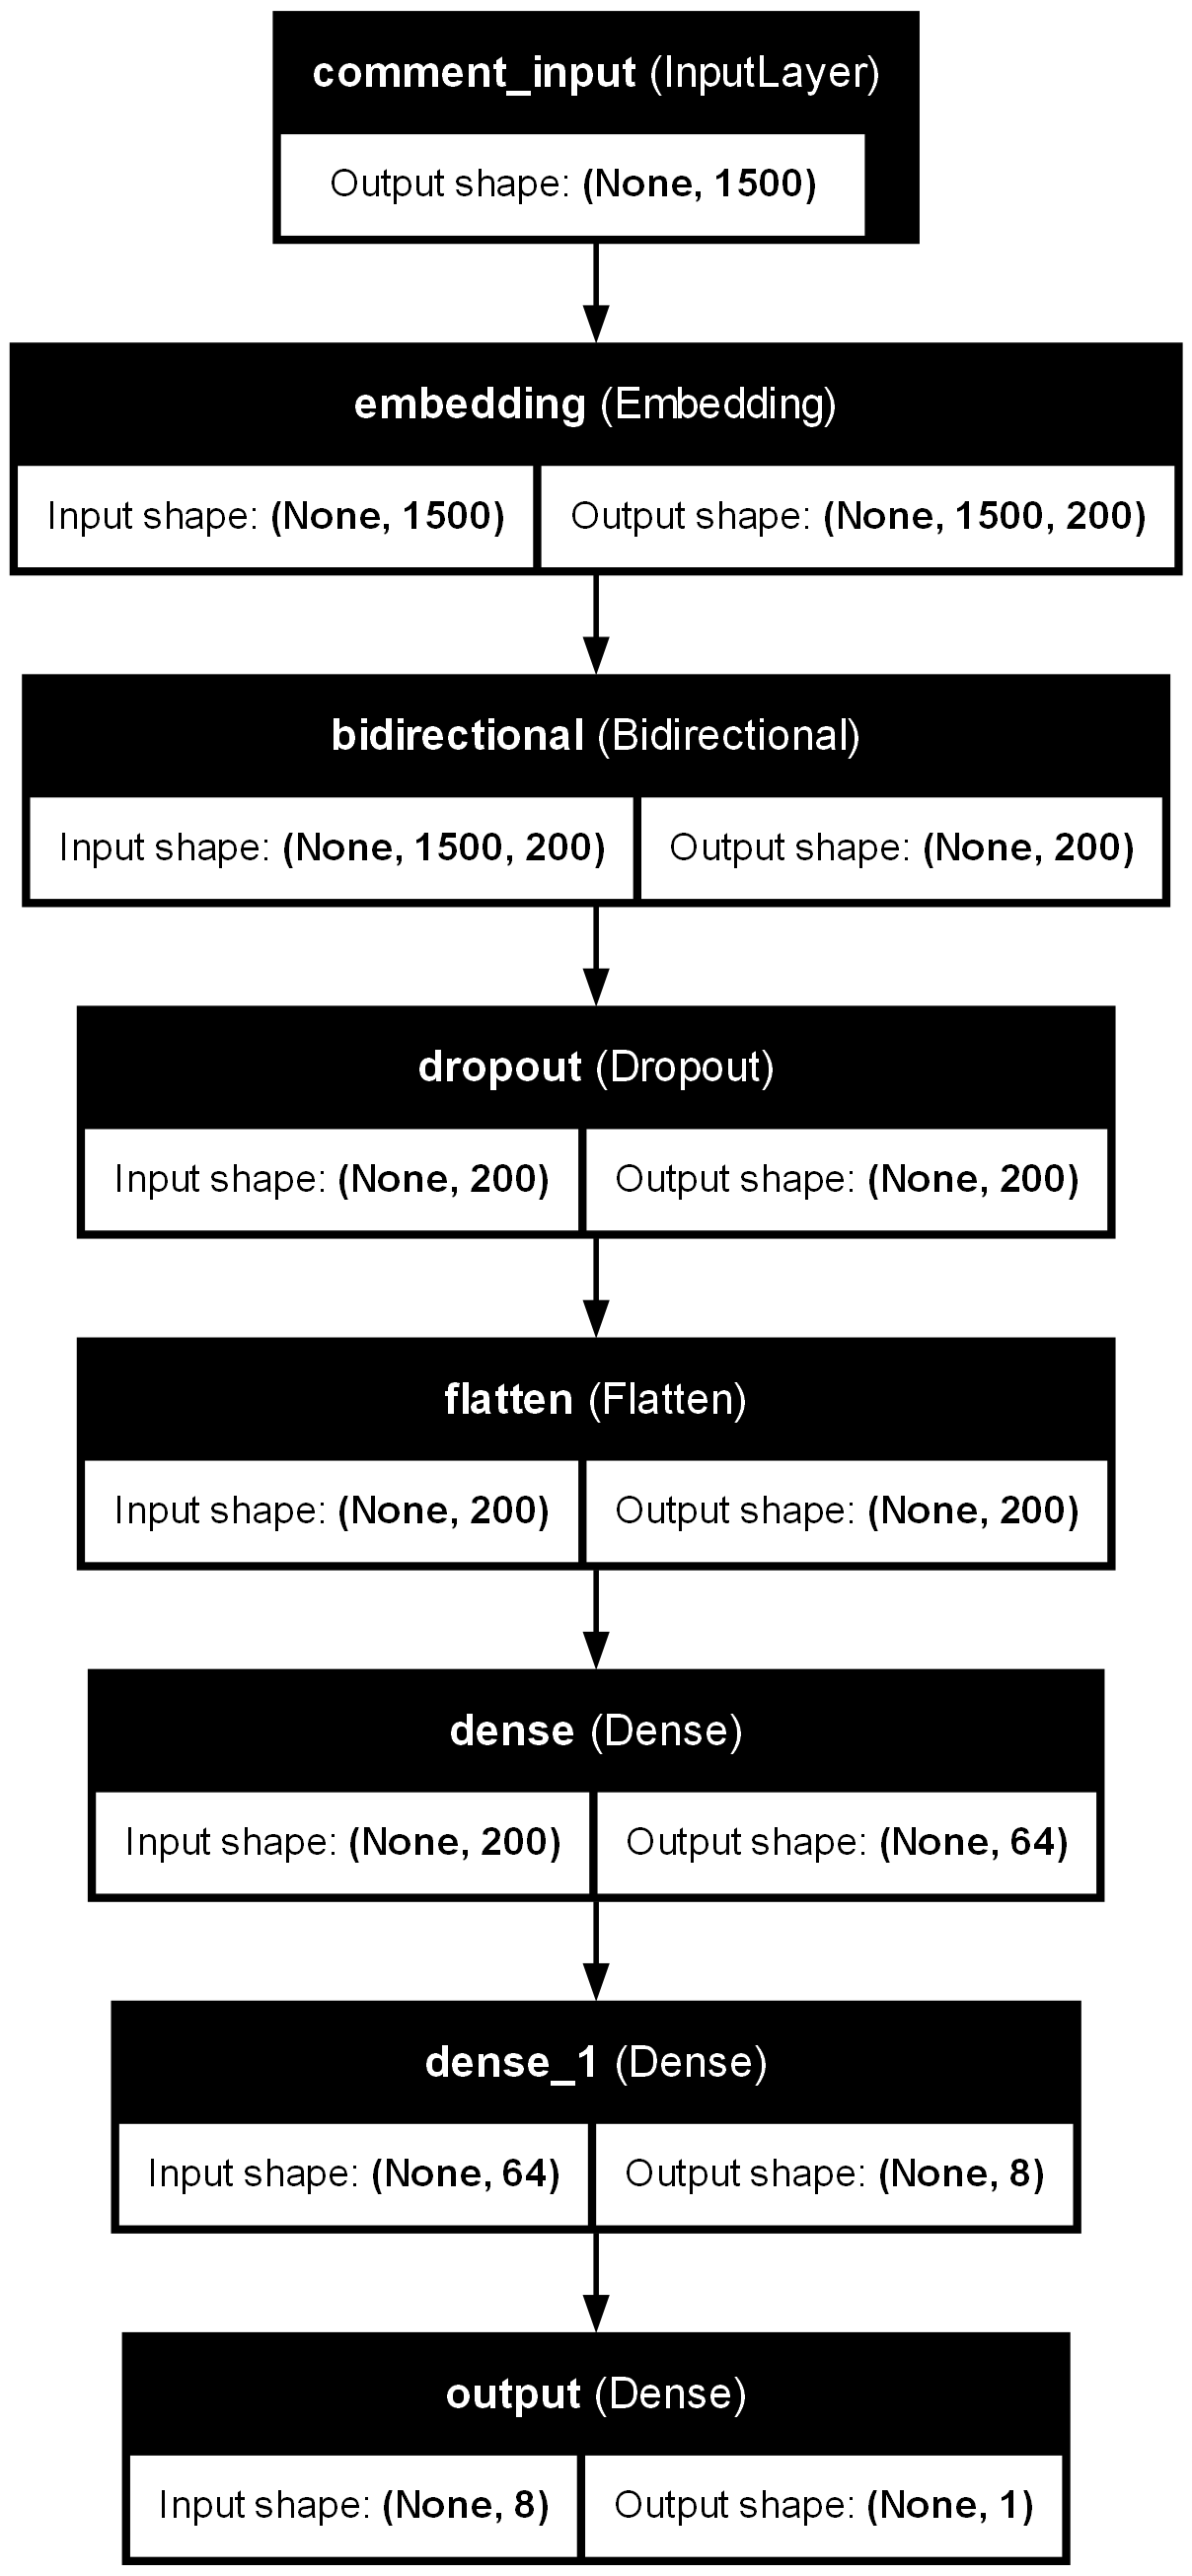

In [90]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [225]:
# Training the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, Y_train, batch_size=64, epochs=20, verbose=1, validation_data=(x_test, Y_test))

# Saving the model
model.save("LSTM_Model-for-Sentimental_Analysis.keras")

Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 974s 33s/step - accuracy: 0.6942 - loss: 0.7484 - val_accuracy: 0.8821 - val_loss: 0.4317
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2374s 83s/step - accuracy: 0.9139 - loss: 0.3677 - val_accuracy: 0.9175 - val_loss: 0.3363
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 438s 15s/step - accuracy: 0.9587 - loss: 0.2403 - val_accuracy: 0.9245 - val_loss: 0.2945
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 445s 15s/step - accuracy: 0.9721 - loss: 0.1912 - val_accuracy: 0.9363 - val_loss: 0.2650
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 460s 16s/step - accuracy: 0.9770 - loss: 0.1591 - val_accuracy: 0.9363 - val_loss: 0.2806
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 505s 17s/step - accuracy: 0.9842 - loss: 0.1474 - val_accuracy: 0.9363 - val_loss: 0.2721
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 486s 17s/step - accuracy: 0.9886 - loss: 0.1172 - val_accuracy: 0.9340 - val_loss: 0.2620
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 507s 18s/step - accuracy: 0.9871 - loss: 0.1173 - val_accuracy: 0

In [227]:
from IPython.display import FileLink
FileLink("LSTM_Model-for-Sentimental_Analysis.keras")

C:\Users\ASUS\OneDrive - SIR PADAMPAT SINGHANIA UNIVERSITY\Desktop\Xebia_Internship_project\LSTM_Model-for-Sentimental_Analysis.keras

In [93]:
# Loading the Model
from tensorflow.keras.models import load_model
model = load_model("LSTM_Model-for-Sentimental_Analysis.keras")

In [95]:
import pickle

# Saving tokenizer file as pickle
with open("tokenizer.pickle", "wb") as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


# Predicting Results

In [234]:
predictions=model.predict(x_test)
predictions=predictions.round().astype('float')
print(len(predictions))
print(predictions)

14/14 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step
424
[[1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1

# Accuracy of Test set

In [237]:
from sklearn.metrics import accuracy_score
Acc=accuracy_score(predictions,Y_test)
print(f"The Accuracy of the model on the test set is :{Acc}")

The Accuracy of the model on the test set is :0.9268867924528302


# Confusion Matrix for Test set

Confusion Matrix for Test set is :


<Axes: >

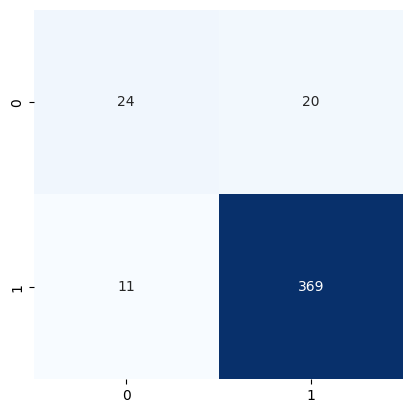

In [240]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(predictions, Y_test)
print("Confusion Matrix for Test set is :")
sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

In [242]:
Predicted_No=cm[0,0]+cm[1,0]
Predicted_Yes=cm[0,1]+cm[1,1]
print(Predicted_No)
print(Predicted_Yes)

negative_reviews=cm[0,0]+cm[0,1]
positive_reviews=cm[1,0]+cm[1,1]

print(negative_reviews)
print(positive_reviews)

35
389
44
380


In [244]:
# This purely justifies 92 plus Accuracy on our Test set

In [246]:
df.comment_text.tail()

1361    Camera is good and displayed is awesome but ba...
654     I am really excited to use dis mobile. Camera ...
1151                   Battery will dry less then 6hours.
1381                      Superb performance all rounder.
577     Absolute killer Flagship from one plus Brand O...
Name: comment_text, dtype: object

In [97]:
# Assigning the example comment from df to a variable
example_comment4 = df.comment_text[1076]
print(example_comment4)

# Preprocess the example comment
preprocessed_comment = text_preprocessing(example_comment4)
print(preprocessed_comment)

# # Tokenize the preprocessed comment
tokenized_comment = tokenizer.texts_to_sequences([preprocessed_comment])
print(tokenized_comment)

# # Pad the tokenized comment
padded_comment = sequence.pad_sequences(tokenized_comment, maxlen=max_comment_length, padding='post')
print(padded_comment)

# # Predict the sentiment of the padded comment
prediction = model.predict(padded_comment)
print(f"Prediction: {prediction}")

# # Convert the prediction to a binary value (0 or 1)
binary_prediction = np.round(prediction).astype('int')
print(f"Binary Prediction: {binary_prediction}")

# # Map the binary prediction to the sentiment
sentiment = "Positive" if binary_prediction[0][0] == 1 else "Negative"
print(f"The sentiment of the example comment is: {sentiment}")


Hitting issu and batter life poor bad battery backup and hitting problam ????.
hitting issu batter life poor bad battery backup hitting problam
[[241, 272, 48, 18, 15, 1, 28, 241]]
[[241 272  48 ...   0   0   0]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediction: [[0.00679347]]
Binary Prediction: [[0]]
The sentiment of the example comment is: Negative


In [99]:
example_comment5 = df.comment_text[1279]
print(example_comment5)

# Preprocessing the example comment
preprocessed_comment = text_preprocessing(example_comment5)
print(preprocessed_comment)

# # Tokenizing the preprocessed comment
tokenized_comment = tokenizer.texts_to_sequences([preprocessed_comment])
print(tokenized_comment)

# # Padding the tokenized comment
padded_comment = sequence.pad_sequences(tokenized_comment, maxlen=max_comment_length, padding='post')
print(padded_comment)

# # Predicting the sentiment of the padded comment
prediction = model.predict(padded_comment)
print(f"Prediction: {prediction}")

# # Converting the prediction to a binary value (0 or 1)
binary_prediction = np.round(prediction).astype('int')
print(f"Binary Prediction: {binary_prediction}")

# # Mapping the binary prediction to the sentiment
sentiment = "Positive" if binary_prediction[0][0] == 1 else "Negative"
print(f"The sentiment of the example comment is: {sentiment}")

Awesome phone too light weight.
awesome phone light weight
[[31, 2, 148, 462]]
[[ 31   2 148 ...   0   0   0]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Prediction: [[0.9993177]]
Binary Prediction: [[1]]
The sentiment of the example comment is: Positive


In [258]:
from sklearn.metrics import classification_report

# Assuming 'predictions' are your model predictions and 'Y_test' is the ground truth
report = classification_report(predictions, Y_test)
print(report)


              precision    recall  f1-score   support

         0.0       0.69      0.55      0.61        44
         1.0       0.95      0.97      0.96       380

    accuracy                           0.93       424
   macro avg       0.82      0.76      0.78       424
weighted avg       0.92      0.93      0.92       424



In [422]:
# Running deployed Model in Anaconda command prompt

# conda activate sentiment_env

# cd "C:\Users\ASUS\OneDrive - SIR PADAMPAT SINGHANIA UNIVERSITY\Desktop\Xebia_Internship_project"

# python -m streamlit run "streamlit_app.py"